Homework 4: Sentiment Analysis - Task 3
----

Names & Sections
----
Names:Anisha Kushwaha 6120
Sarthak Kagliwal 6120 (Write these in every notebook you submit. For each partner, write down whether you are a 4120 or a 6120 student.)

Task 3: Train a Logistic Regression Model (20 points)
----

Using `sklearn`'s implementation of `LogisticRegression`, conduct a similar analysis on the performance of a Logistic Regression classifier on the provided data set.

Using the `time` module, you'll compare and contrast how long it takes your home-grown BoW vectorizing function vs. `sklearn`'s `CountVectorizer`.


In [1]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
import time
import sentiment_utils as sutils
import numpy as np
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "own_train.txt"
DEV_FILE = "own_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

# some variables you may want to use
# BINARIZED = True
# USE_COUNT_VECTORIZER = False

X_train, Y_train  = train_tups[0], np.array(train_tups[1])
X_dev, Y_dev  = dev_tups[0], dev_tups[1]

In [3]:
len(train_tups[0])

1200

In [4]:
# Write the functions needed (here or in sentiment_utils.py) to create vectorized BoW representations
# of your data. We recommend starting with a multinomial BoW representation.
# Each training example should be represented as a sparse vector.
vocab = sutils.create_index(X_train)
def word_feats(data_to_be_featurized_X, binary) -> dict:
    bow = []
    if binary:
        vector = sutils.featurize(vocab, data_to_be_featurized_X, True)
    else:
        vector = sutils.featurize(vocab, data_to_be_featurized_X, False)
#     for ind in vector:
#         bow.append(dict([(vocab[i], ind[i]) for i in range(len(vocab))]))

    return vector



In [5]:
# how much time does it take to featurize the all data with your implementation?

start = time.time()

# YOUR CODE HERE

tr_mul_bow = word_feats(X_train, False)
tr_bin_bow = word_feats(X_train, True)

end = time.time()
print("That took:", end - start, "seconds")

print(tr_mul_bow.shape)
print(tr_bin_bow.shape)

That took: 16.610148191452026 seconds
(1200, 4205)
(1200, 4205)


In [6]:
dev_bin_bow = word_feats(X_dev, True)
dev_mul_bow = word_feats(X_dev, False)

print(dev_bin_bow.shape)
print(dev_mul_bow.shape)

(300, 4205)
(300, 4205)


In [7]:
# how much time does it take to featurize the all data with sklearn's CountVectorizer?
start = time.time()


# YOUR CODE HERE


documents = [' '.join(document) for document in X_train]
mul_vec = CountVectorizer()
train_mul_bow_sk = mul_vec.fit_transform(documents).toarray()

bin_vec = CountVectorizer(binary=True)
train_bin_bow_sk = bin_vec.fit_transform(documents).toarray()


end = time.time()
print("That took:", end - start, "seconds")


print(train_mul_bow_sk.shape)
print(train_bin_bow_sk.shape)

That took: 0.14727187156677246 seconds
(1200, 3553)
(1200, 3553)


In [8]:
dev_mul_vec = CountVectorizer(vocabulary=mul_vec.vocabulary_)
dev_mul_bow_sk = dev_mul_vec.fit_transform([' '.join(document) for document in X_dev]).toarray()
dev_bin_vec = CountVectorizer(vocabulary=bin_vec.vocabulary_)
dev_bin_bow_sk = dev_bin_vec.fit_transform([' '.join(document) for document in X_dev]).toarray()
print(dev_bin_bow_sk.shape)
print(dev_mul_bow_sk.shape)

(300, 3553)
(300, 3553)


1. How big is your vocabulary using your vectorization function(s)? movie review:30705, own data: 4205
2. How big is your vocabulary using the `CountVectorizer`? movie review: 22596, own data: 3553

In [9]:
#  write any code you need analyze the relative sparsity of your vectorized representations of the data

# YOUR CODE HERE
vocab_size = tr_mul_bow.shape[1]
row_zeros = vocab_size - np.count_nonzero(tr_mul_bow, axis=1)
percent_zeros = (row_zeros / vocab_size) * 100

# Print out the average % of entries that are zeros in each vector in the vectorized training data
# YOUR CODE HERE
avg_zeros = np.mean(percent_zeros)
print(f"Average percentage of zeros: {avg_zeros:.2f}%")

Average percentage of zeros: 99.66%


Predicted output for first sample of dev data: [0]
Precision: 0.70
Recall: 0.51
F1 Score: 0.59
Accuracy: 0.79
Predicted output for first sample of dev data: [0]
Precision: 0.70
Recall: 0.54
F1 Score: 0.61
Accuracy: 0.79
Predicted output for first sample of dev data: [0]
Precision: 0.84
Recall: 0.60
F1 Score: 0.70
Accuracy: 0.85
Predicted output for first sample of dev data: [0]
Precision: 0.83
Recall: 0.58
F1 Score: 0.68
Accuracy: 0.84
F1 score multinomial BoW: 0.61
F1 score multinomial CV BoW: 0.68
F1 score binarized BoW: 0.59
F1 score binarized CV BoW: 0.70
Predicted output for first sample of dev data: [0]
Predicted output for first sample of dev data: [0]
Predicted output for first sample of dev data: [0]
Predicted output for first sample of dev data: [0]
Predicted output for first sample of dev data: [0]
Predicted output for first sample of dev data: [0]
Predicted output for first sample of dev data: [0]
Predicted output for first sample of dev data: [0]
Predicted output for first

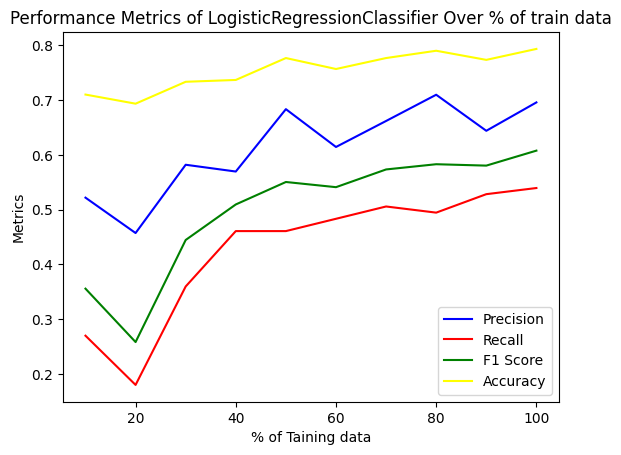

<Figure size 640x480 with 0 Axes>

In [10]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)


# Fit the model to the training data
def train_LRclassifier(tr_data_per, train_data, dev_bow):
    tr_data_len = int(len(train_data[0]) * tr_data_per)
    random_indices = np.random.choice(len(train_data[0]), tr_data_len, replace=False)
    X_tr = train_data[0][random_indices]
    Y_tr = train_data[1][random_indices]
    LRClassifier = LogisticRegression(random_state=42, solver='liblinear', max_iter=2000)
    LRClassifier.fit(X_tr, Y_tr)
    # LRClassifier.fit(bow_used[:tr_data_len], Y_train[:tr_data_len])
    LRpred = LRClassifier.predict([dev_bow[0]])

    print(f'Predicted output for first sample of dev data: {LRpred}')
    return LRClassifier

def generate_LR_models(tr_data_per, train_data, dev_data, verbose):
    LRtrain_model = train_LRclassifier(tr_data_per, train_data, dev_data[0])
    LR_model_pred = LRtrain_model.predict(dev_data[0])
    LR_metrics = sutils.get_prfa(dev_data[1], LR_model_pred, verbose)
    return LR_metrics

LR_Bin_metrics = generate_LR_models(1.0, [tr_bin_bow, Y_train], [dev_bin_bow, Y_dev], True)
LR_Mul_metrics = generate_LR_models(1.0, [tr_mul_bow, Y_train], [dev_mul_bow, Y_dev], True)


LR_Bin_metrics_CV = generate_LR_models(1.0, [train_bin_bow_sk, Y_train], [dev_bin_bow_sk, Y_dev], True)
LR_Mul_metrics_CV = generate_LR_models(1.0, [train_mul_bow_sk, Y_train], [dev_mul_bow_sk, Y_dev], True)

# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels
LRmodels = []
def generate_graphs(train_data, dev_data):
    prfa_values = [[],[],[],[]]
    training_len = []
    for i in np.arange(0.1, 1.1, 0.1):
        training_len.append(i*100)
        LR_metrics = generate_LR_models(i, train_data, dev_data, False)
        for i in range(len(LR_metrics)):
            prfa_values[i].append(LR_metrics[i])
    # training_len.append(100)
    return training_len, prfa_values

print(f'F1 score multinomial BoW: {LR_Mul_metrics[2]:.2f}')
print(f'F1 score multinomial CV BoW: {LR_Mul_metrics_CV[2]:.2f}')

print(f'F1 score binarized BoW: {LR_Bin_metrics[2]:.2f}')
print(f'F1 score binarized CV BoW: {LR_Bin_metrics_CV[2]:.2f}')


if LR_Bin_metrics[2] > LR_Mul_metrics[2]:
    x_axis, y_axis = generate_graphs([tr_bin_bow, Y_train], [dev_bin_bow, Y_dev])
else:
    x_axis, y_axis = generate_graphs([tr_mul_bow, Y_train], [dev_mul_bow, Y_dev])


sutils.create_training_graph(x_axis, y_axis, 'LogisticRegressionClassifier', 'LRgraph4.png')

# takes approx 30 sec on Felix's computer

Test the following 4 combinations to determine which has the best final f1 score for your Logistic Regression model:
- your vectorized features, multinomial: 0.61
- CountVectorizer features, multinomial: 0.68
- your vectorized features, binarized: 0.57
- CountVectorizer features, binarized: 0.70

Produce your graph(s) for the combination with the best final f1 score.




6120 REQUIRED
----

Find the top 100 most important features to your Logistic Regression classifier when using 100% of the training data. To access the weights of your model, you can access the `model.coef_` attribute. You'll want to use a `StandardScalar` preprocessor. This will help us deal with the fact that we expect counts of certain words to be higher (e.g. stop words).

To find the importance of a feature, calculate the absolute value of each weight in the model, then order your features according to the absolute values of these weights. The feature with the heighest absolute value weight has the most importance.

Use __your__ (not CountVectorizer) multinomial vectors for this analysis.

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [12]:
# YOUR CODE HERE
# train a model on the scaled inputs
# This takes Felix's computer about 6.5 sec to run
scaler = StandardScaler()
scaled_tr_mul_bow = scaler.fit_transform(tr_mul_bow)
scaled_model = LogisticRegression()
scaled_model.fit(scaled_tr_mul_bow, Y_train)


LogisticRegression()

In [13]:
# print out the top 20 most informative features according to this model
coef_abs = np.abs(scaled_model.coef_)
top_20_indices = np.argsort(coef_abs)[0][-20:]
for i in top_20_indices:
  print(f' {vocab[i]}')

 too
 *
 hilarious
 Not
 yep
 thank
 sorry
 sure
 goodnight
 kind
 great
 welcome
 fun
 thanks
 nice
 love
 Happy
 Thank
 good
 awesome


In [14]:
# re-evalaute your LR model with inputs that have been filtered to only use the top 500 most informative features
top_500features_indices = np.argsort(coef_abs).flatten()[-500:]
train_filtered = scaled_tr_mul_bow[:, top_500features_indices]
scaled_model.fit(train_filtered, Y_train)

LogisticRegression()

In [15]:
scaled_dev_mul_bow = scaler.fit_transform(dev_mul_bow)
dev_filtered = scaled_dev_mul_bow[:, top_500features_indices]

In [16]:
train_filtered.shape

(1200, 500)

In [17]:
dev_filtered.shape

(300, 500)

Predicted output for first sample of dev data: [0]
Predicted output for first sample of dev data: [0]
Predicted output for first sample of dev data: [0]
Predicted output for first sample of dev data: [0]
Predicted output for first sample of dev data: [0]
Predicted output for first sample of dev data: [0]
Predicted output for first sample of dev data: [0]
Predicted output for first sample of dev data: [0]
Predicted output for first sample of dev data: [0]
Predicted output for first sample of dev data: [0]


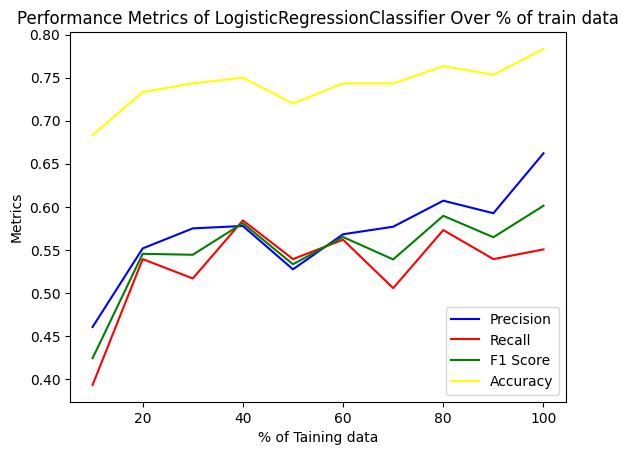

<Figure size 640x480 with 0 Axes>

In [18]:
# create the same graph as before, but with the filtered inputs
sx_axis, sy_axis = generate_graphs([train_filtered, Y_train], [dev_filtered, Y_dev])
sutils.create_training_graph(sx_axis, sy_axis, 'LogisticRegressionClassifier', 'LRgraphfilt.png')
